In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import time
from datetime import date, timedelta
from ripser import ripser
from persim import plot_diagrams
import persim
from ripser import Rips
import sys
sys.path.insert(1, './Pyscapes')
from PersistenceLandscapeExact import PersLandscapeExact
from PersistenceLandscapeGrid import PersLandscapeApprox
from visualization import plot_landscape
from persim.landscapes import plot_landscape_simple

In [9]:
def initialize_data(files = ['SPY', 'NASDAQ', 'RUSSELL', 'DJIA'], cols = ['Date', ' Close']):
    sdate = date(1990,8,10)
    edate = date(2023,11,23)
    pd.date_range(sdate,edate-timedelta(days=1),freq='d')
    final_df = pd.DataFrame()
    final_df['date'] = pd.date_range(sdate,edate-timedelta(days=1),freq='d')
    
    for file in files:
        df = pd.read_csv(f'data/{file}.csv')
        df = df[cols]
        df.columns = ['date', f'{file}_close']
        df = df.loc[df[f'{file}_close'] != 0]
        df[f'{file}_return'] = np.log(df[f'{file}_close']/df[f'{file}_close'].shift(-1))
        df = df.dropna()
        df['date'] = pd.to_datetime(df['date'])
        
        final_df = final_df.merge(df)
    final_df = final_df.set_index('date')
    final_df.index = pd.to_datetime(final_df.index)
    return final_df

def create_diagram(lst, cols, start_date, end_date, events, name, window_length = 50):
    df = initialize_data(files = lst, cols = cols)
    ret_cols = [f'{name}_return' for name in lst]
    res = []

    for index in range(len(df) - window_length - 1):
        data = df[ret_cols].iloc[index:index+window_length]
        diagrams = ripser(data)['dgms']
        M = PersLandscapeExact(dgms=diagrams, hom_deg = 1)
        M.compute_landscape()
        res.append((df.iloc[index+window_length//2].name, M.p_norm(p = 1), M.p_norm(p = 2)))
    
    res_df = pd.DataFrame(res)
    res_df.columns = ['date', 'l1', 'l2']
    
    res_df['l1'] = (res_df['l1'] - res_df['l1'].mean())/res_df['l1'].std()
    res_df['l2'] = (res_df['l2'] - res_df['l2'].mean())/res_df['l2'].std()
    plt.rcParams["figure.figsize"] = (12, 7)
    plt.plot(res_df['date'], res_df['l1'], alpha = 0.4, label = 'L1 Norm Normalized')
    plt.plot(res_df['date'], res_df['l2'], alpha = 0.4, label = 'L2 Norm Normalized')
    
    plt.xlim(start_date, end_date)
    
    colors = ['red', 'yellow', 'lime', 'cyan', 'darkviolet']
    ind = 0
    for event in events:
        event_date, event_label = event
        plt.axvline(event_date, color = colors[ind], linestyle = '--', label = event_label)
        ind += 1
    
    plt.legend()
    plt.xticks(rotation=45)
    plt.title(f"Sliding Window Norm Calculations - {name}")
    plt.show()
    

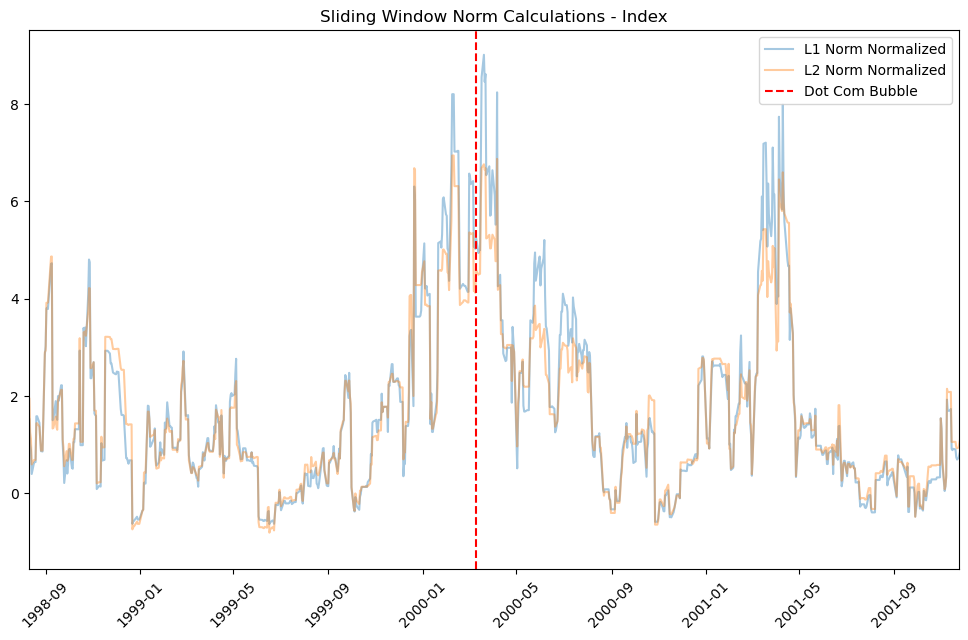

In [14]:
create_diagram(['SPY', 'NASDAQ', 'RUSSELL', 'DJIA'],
               ['Date', ' Close'], date(1998,8,10),
               date(2001, 11, 23), [(date(2000,3,10), 'Dot Com Bubble')], name = 'Index')

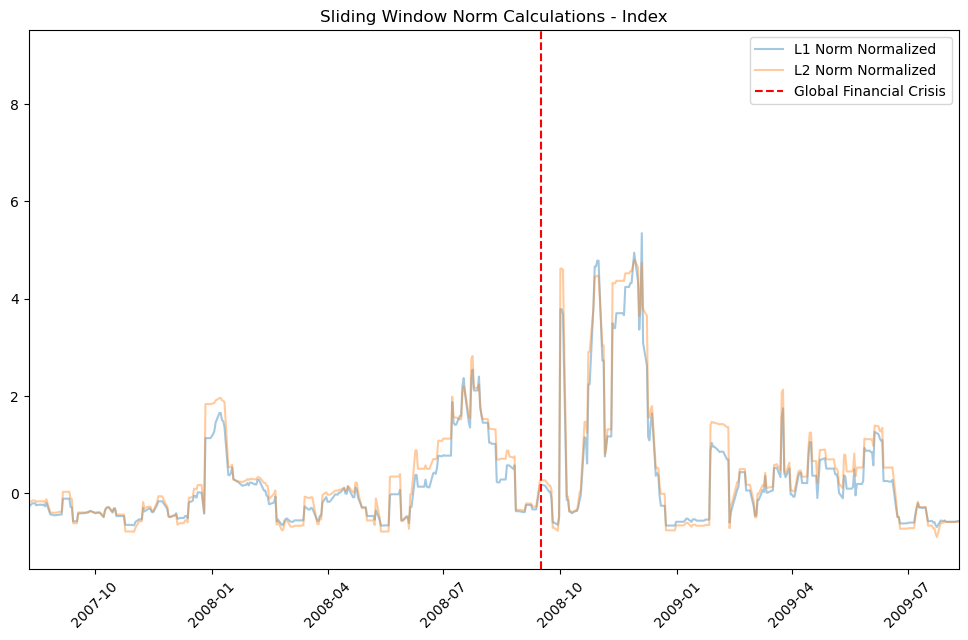

In [15]:
create_diagram(['SPY', 'NASDAQ', 'RUSSELL', 'DJIA'],
               ['Date', ' Close'], date(2007,8,10),
               date(2009, 8, 10), [(date(2008,9,16), 'Global Financial Crisis')], name = 'Index')

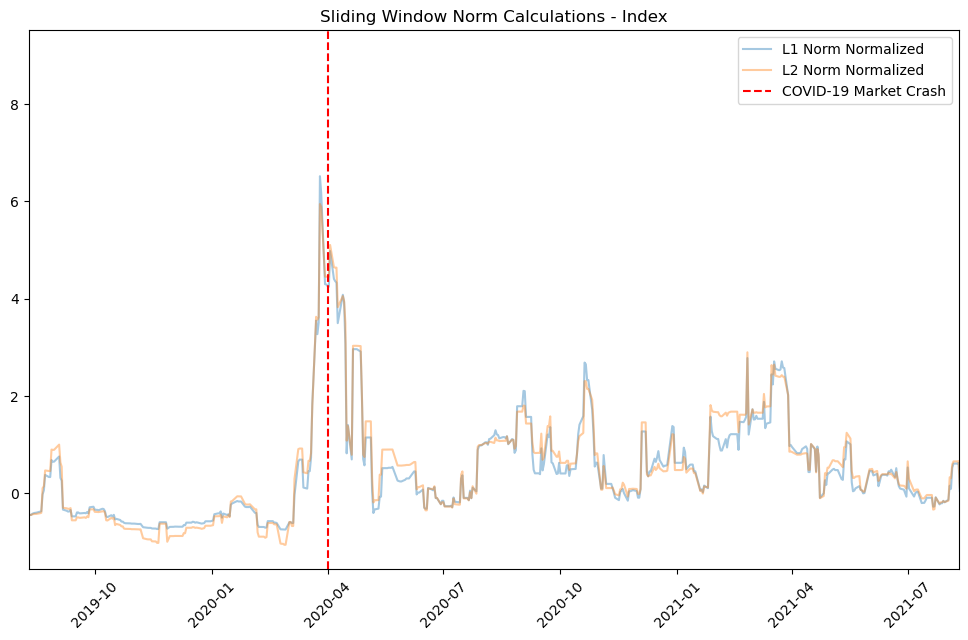

In [21]:
create_diagram(['SPY', 'NASDAQ', 'RUSSELL', 'DJIA'],
               ['Date', ' Close'], date(2019,8,10),
               date(2021, 8, 10), [(date(2020,4,1), 'COVID-19 Market Crash')], name = 'Index')

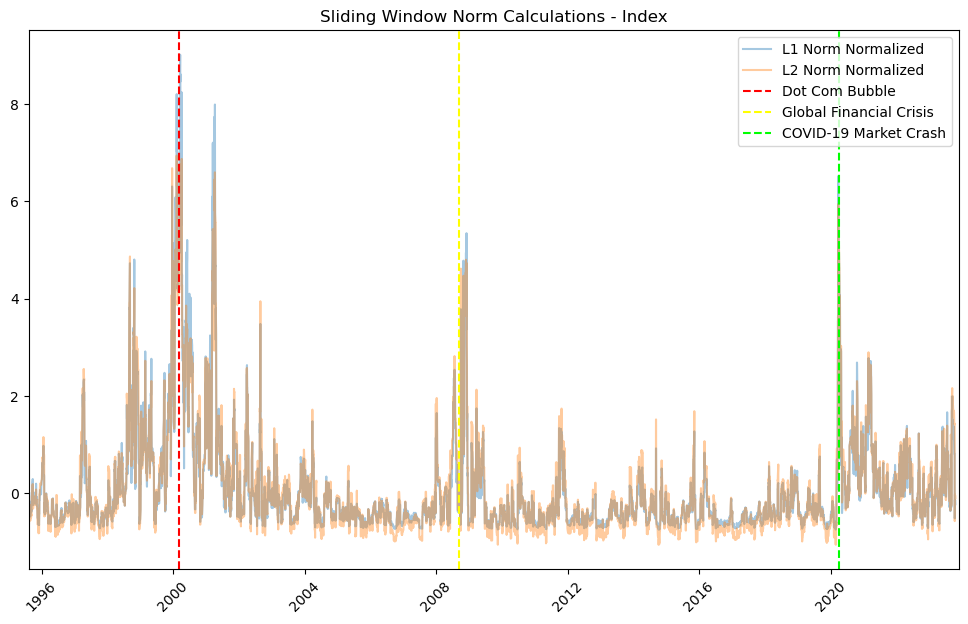

In [23]:
index_start_date = date(1995,8,10)
index_end_date = date(2023, 11, 23)
index_events = [(date(2000,3,10), 'Dot Com Bubble'),
                (date(2008,9,16), 'Global Financial Crisis'),
                (date(2020,4,1), 'COVID-19 Market Crash')]


create_diagram(index_list,index_cols, index_start_date, index_end_date, index_events, name = 'Index')

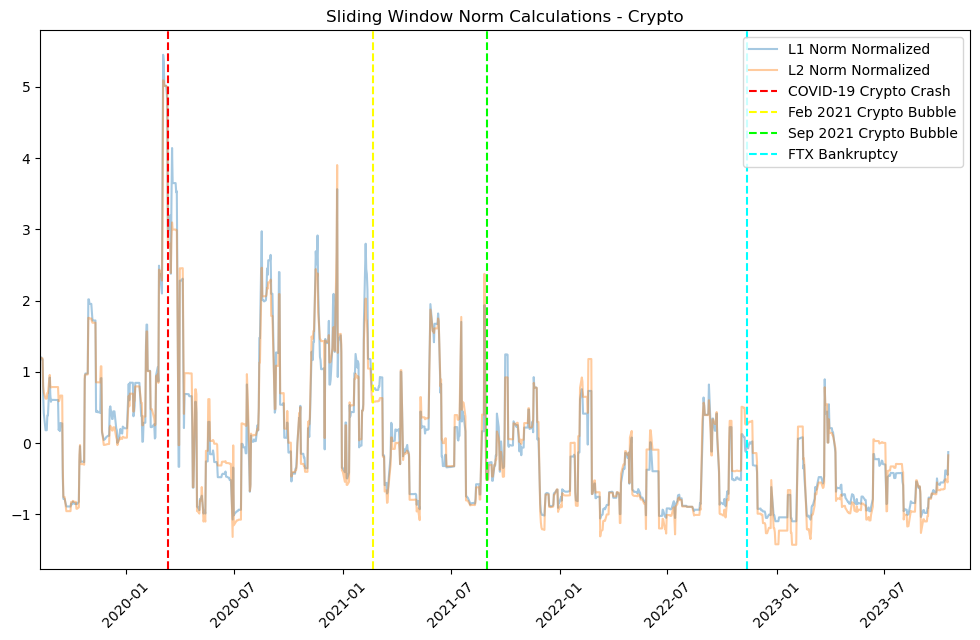

In [34]:
crypto_list = ['BITCOIN', 'ETHERIUM']
crypto_cols = ['Date', ' Close']
crypto_start_date = date(2019,8,10)
crypto_end_date = date(2023, 11, 23)
crypto_events = [(date(2020,3,12), 'COVID-19 Crypto Crash'),
                (date(2021,2,20), 'Feb 2021 Crypto Bubble'),
                 (date(2021,9,1), 'Sep 2021 Crypto Bubble'),
                 (date(2022,11,12), 'FTX Bankruptcy')
                ]
create_diagram(crypto_list, crypto_cols, crypto_start_date, crypto_end_date, crypto_events, name = 'Crypto')

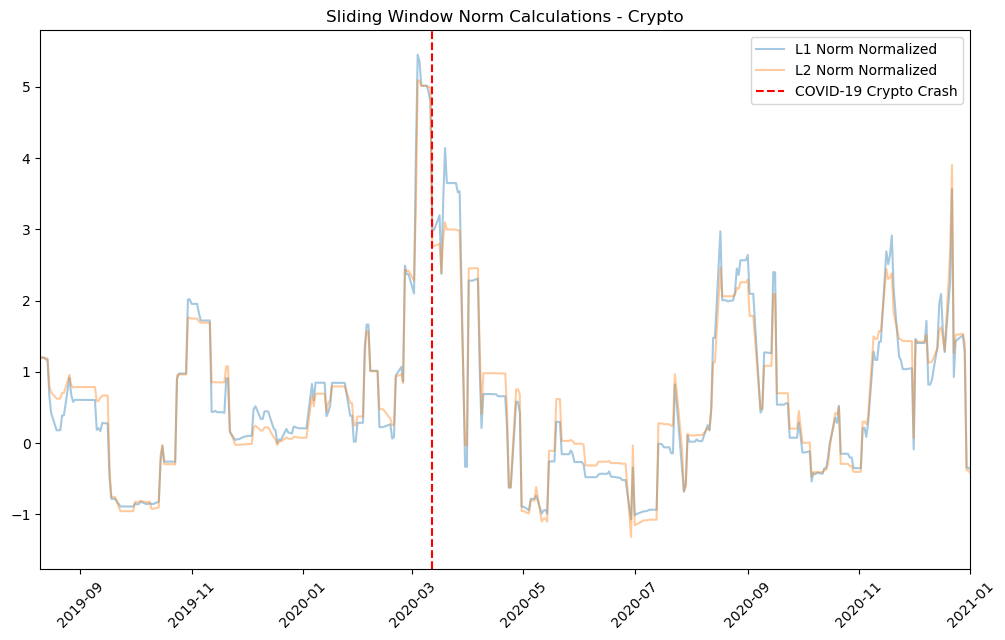

In [25]:
create_diagram(['BITCOIN', 'ETHERIUM'],['Date', ' Close'], 
               date(2019,8,10), date(2021,1,1),
               [(date(2020,3,12), 'COVID-19 Crypto Crash')], name = 'Crypto')

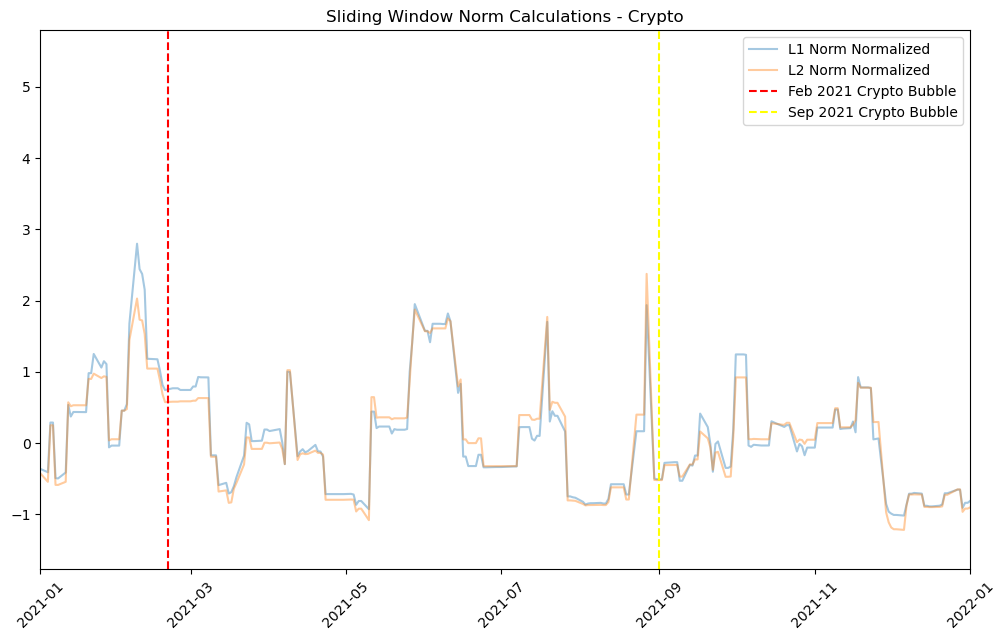

In [33]:
create_diagram(['BITCOIN', 'ETHERIUM'],['Date', ' Close'], 
               date(2021,1,1), date(2022,1,1),
               [(date(2021,2,20), 'Feb 2021 Crypto Bubble'),
                 (date(2021,9,1), 'Sep 2021 Crypto Bubble')], name = 'Crypto')

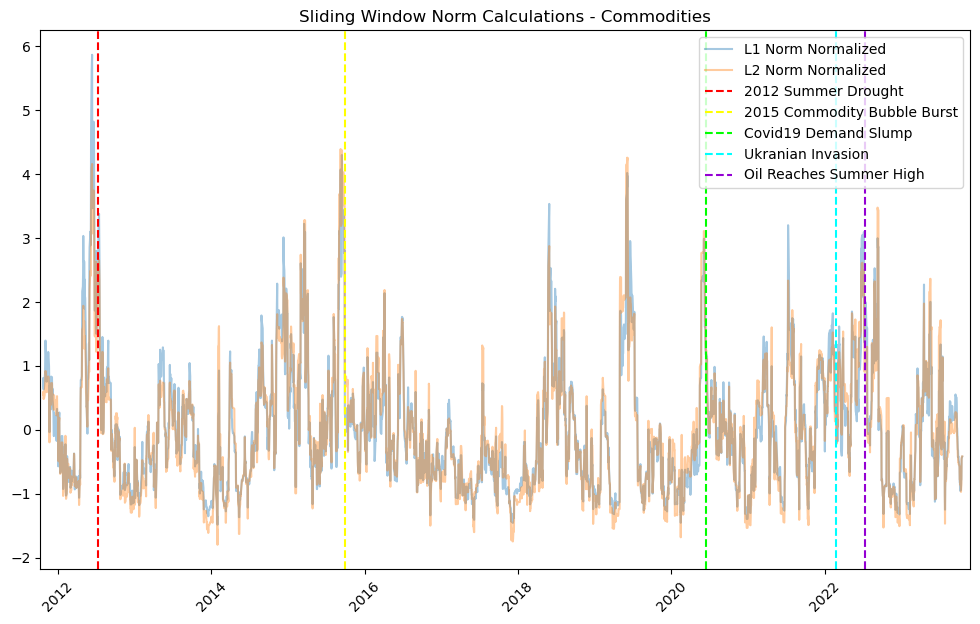

In [47]:
com_list = ['CORN', 'USO', 'WEAT', 'SOYB']
com_cols = ['Date', 'Adj Close']
com_start_date = date(2011,10,10)
com_end_date = date(2023, 11, 23)
com_events = [(date(2012, 7, 10), '2012 Summer Drought'), 
             (date(2015, 9, 30), '2015 Commodity Bubble Burst'),
              (date(2020, 6, 12), 'Covid19 Demand Slump'),
              (date(2022, 2, 24), 'Ukranian Invasion'), 
               (date(2022, 7, 10), 'Oil Reaches Summer High')
             ]

create_diagram(com_list, com_cols, com_start_date, com_end_date, com_events, name = 'Commodities')

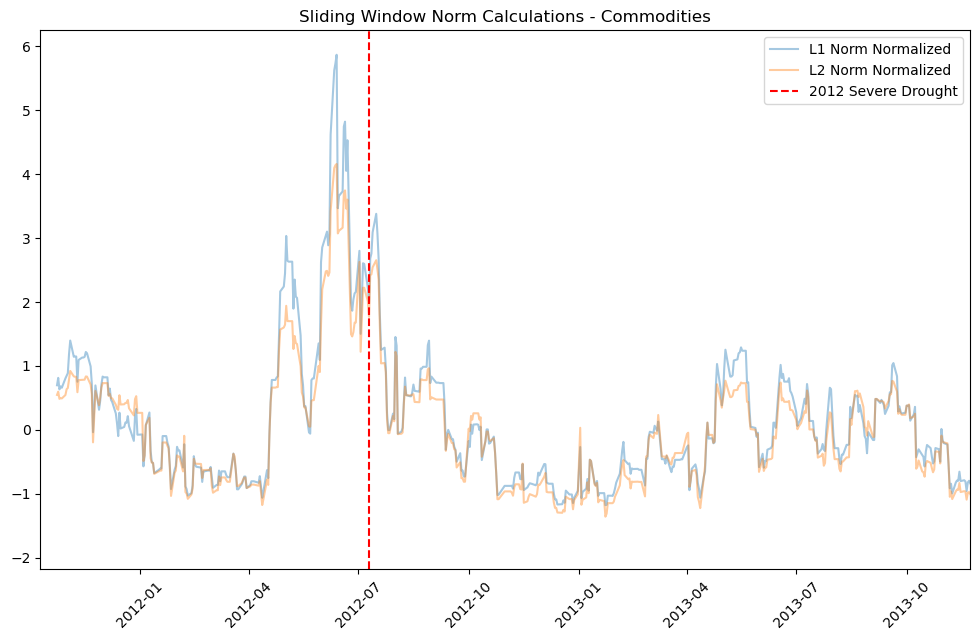

In [36]:
create_diagram(['CORN', 'USO', 'WEAT', 'SOYB'], ['Date', 'Adj Close']
               , date(2011,10,10), date(2013, 11, 23), [(date(2012, 7, 10), '2012 Summer Drought')], name = 'Commodities')

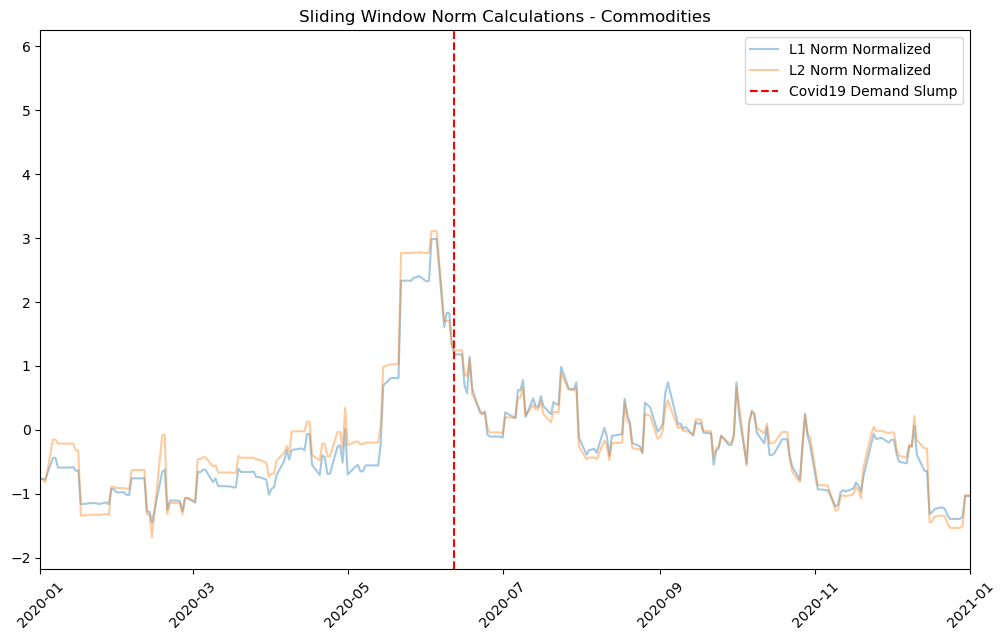

In [43]:
create_diagram(['CORN', 'USO', 'WEAT', 'SOYB'], ['Date', 'Adj Close']
               , date(2020,1,1), date(2021, 1, 1), [(date(2020, 6, 12), 'Covid19 Demand Slump')], name = 'Commodities')

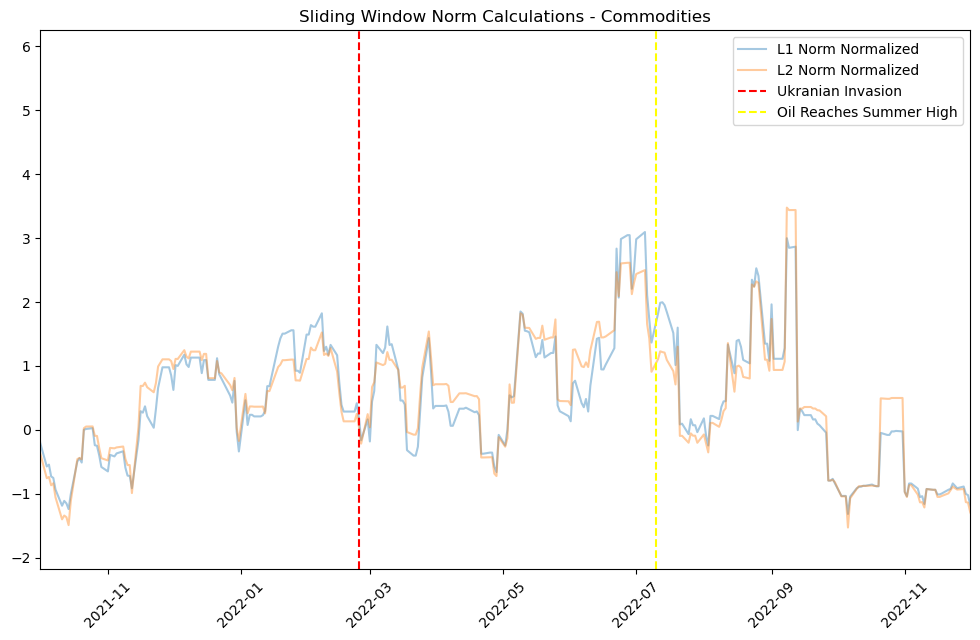

In [46]:
create_diagram(['CORN', 'USO', 'WEAT', 'SOYB'], ['Date', 'Adj Close']
               , date(2021,10,1), date(2022, 12, 1), 
               [(date(2022, 2, 24), 'Ukranian Invasion'), 
               (date(2022, 7, 10), 'Oil Reaches Summer High')
               ], 
               name = 'Commodities')

In [48]:
import warnings
warnings.filterwarnings("ignore")

def create_return_plots(lst, cols, start_date, end_date, name):
    df = initialize_data(files = lst, cols = cols)
    close_cols = [f'{name}_close' for name in lst]
    plt.rcParams["figure.figsize"] = (10, 4)
    for close_col in close_cols:
        df[close_col] = (df[close_col] - df[close_col].mean())/df[close_col].std()
    
    fig, ax = plt.subplots(1, 2)
    
    for close_col in close_cols:
        label = close_col.split('_')[0]
        ax[0].plot(df.index, df[close_col], alpha = 0.5, label = label)
    ax[0].legend()
    ax[0].set_title(f"Normalized Price Movement - {name}")
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
    ret_cols = [f'{name}_return' for name in lst]

    for ret_col in ret_cols:
        label = ret_col.split('_')[0]
        ax[1].hist(df[ret_col], alpha = 0.5, bins = 50, label = label)
    
    ax[1].legend()
    ax[1].set_title(f"Log Return Distribution - {name}")

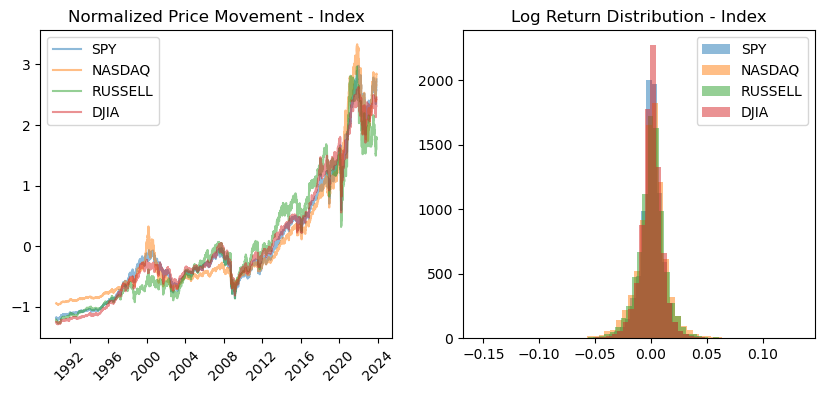

In [49]:
create_return_plots(index_list, index_cols, index_start_date, index_end_date, name = 'Index')

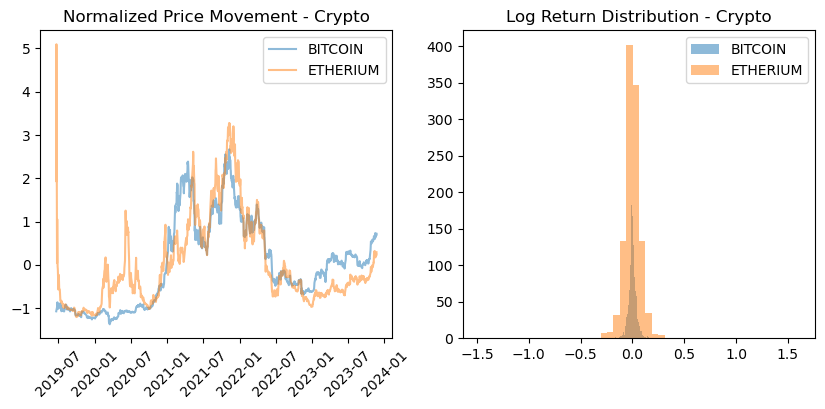

In [50]:
create_return_plots(crypto_list, crypto_cols, crypto_start_date, crypto_end_date, name = 'Crypto')

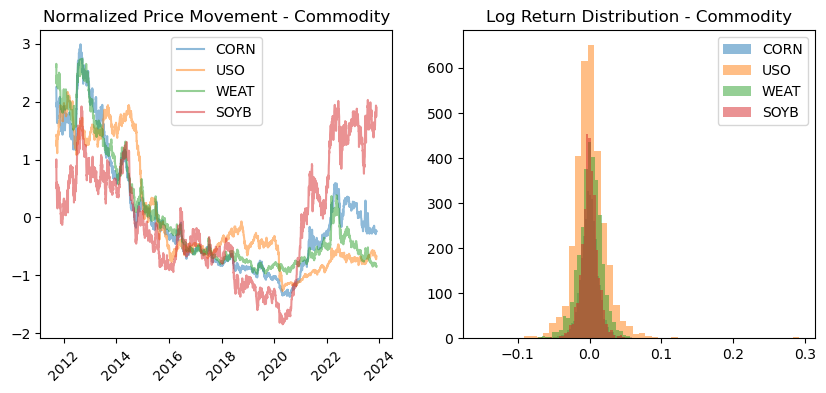

In [51]:
create_return_plots(com_list, com_cols, com_start_date, com_end_date, name = 'Commodity')

In [52]:
def create_landscape(lst, cols, event, name, window = 50):
    event_date, event_name = event
    ret_cols = [f'{name}_return' for name in lst]
    df = initialize_data(files = lst, cols = cols)
    
    start = str(event_date - timedelta(days = window//2))
    end = str(event_date + timedelta(days = window//2))
    
    data = df[ret_cols].loc[start:end]
    diagrams = ripser(data)['dgms']
    M = PersLandscapeExact(dgms=diagrams, hom_deg = 1)
    plt.rcParams["figure.figsize"] = (5,5)
    plot_diagrams(diagrams, title = f'{event_name} {name} Persistance Diagrams')
    plot_landscape(M,title= f'{event_name} {name} Persistance Landscape')
    

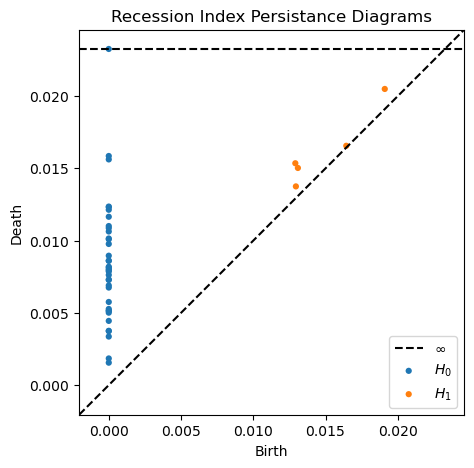

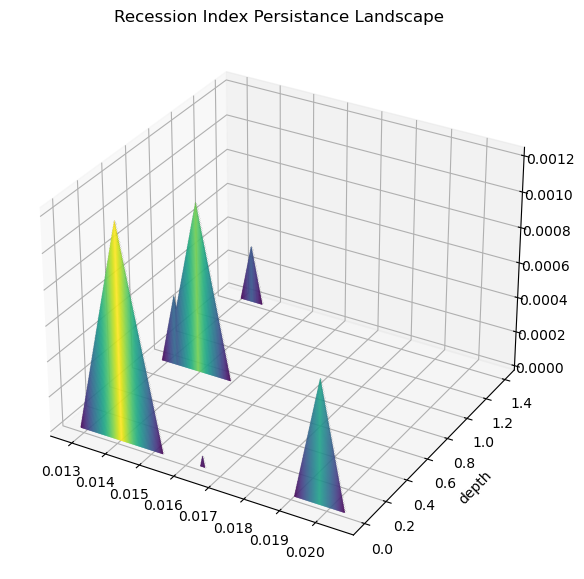

In [82]:
gfc = (date(2008,8,1), 'Recession')
create_landscape(index_list, index_cols, gfc, 'Index')

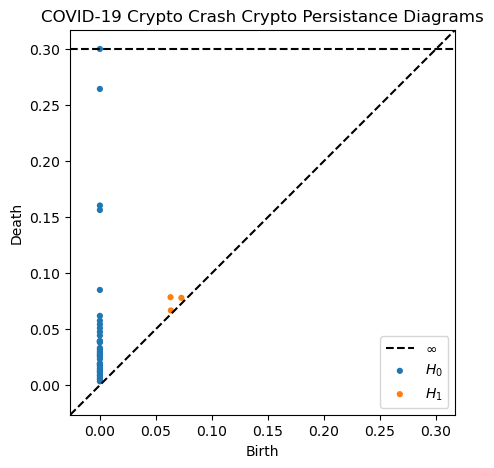

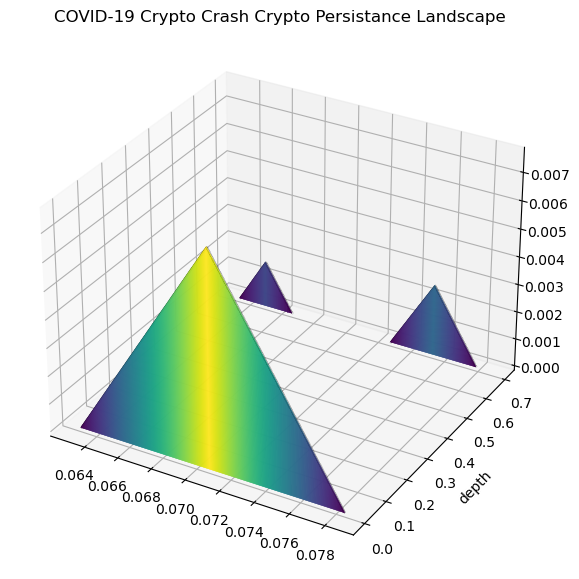

In [79]:
crypto_crash = (date(2020,2,29), 'COVID-19 Crypto Crash')
create_landscape(crypto_list, crypto_cols, crypto_crash, 'Crypto')

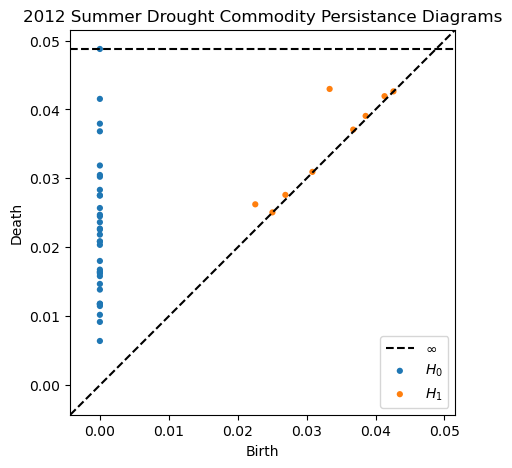

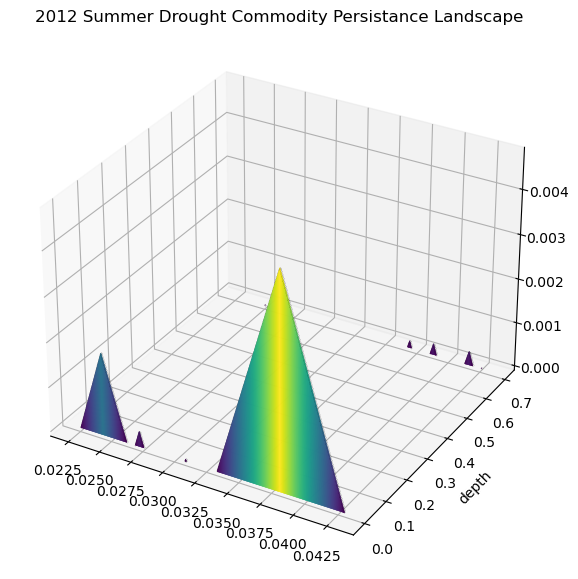

In [137]:
summer_drought = (date(2012, 7, 10), '2012 Summer Drought')
create_landscape(com_list, com_cols, summer_drought, 'Commodity')

In [129]:
def plot_scatter_return(lst, cols, event, name, ind = [0, 1], window = 50):
    event_date, event_name = event
    ret_cols = [f'{name}_return' for name in lst]
    df = initialize_data(files = lst, cols = cols)
    
    start = str(event_date - timedelta(days = window//2))
    end = str(event_date + timedelta(days = window//2))
    
    data = df[ret_cols].loc[start:end]
    plt.scatter(data[ret_cols[ind[0]]], data[ret_cols[ind[1]]], 
                marker = 'D', linewidth = 6, alpha = 0.5, color = 'orange')
    plt.xlabel(f'{ret_cols[ind[0]]}')
    plt.title(f'{event[1]} Return Plot' )
    plt.ylabel(f'{ret_cols[ind[1]]}')

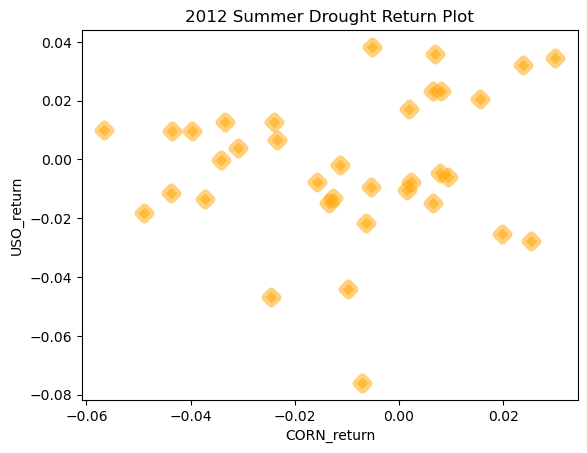

In [130]:
summer_drought = (date(2012, 7, 10), '2012 Summer Drought')
plot_scatter_return(com_list, com_cols, summer_drought, 'Crypto')

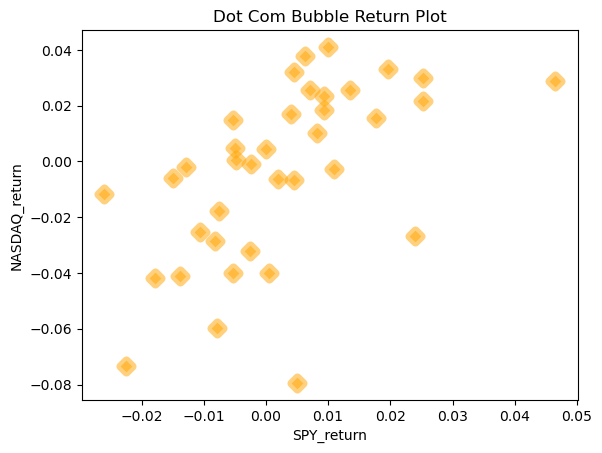

In [136]:
gfc = (date(2000,3,18), 'Dot Com Bubble')
plot_scatter_return(index_list, index_cols, gfc, 'Index')